In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



# Question 1

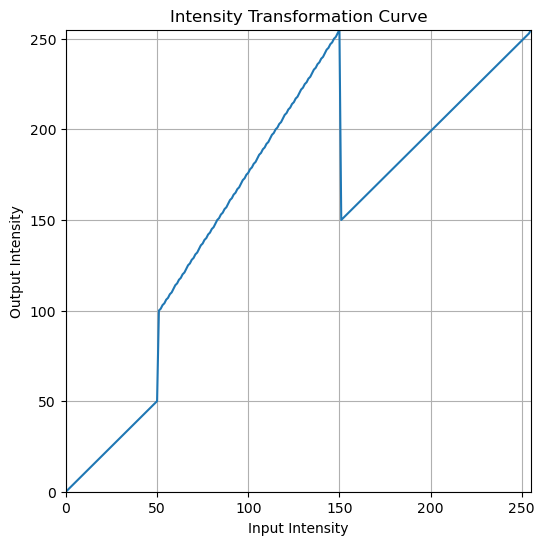

In [16]:
# Load the image in grayscale
image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None, "Image not found - check the path"

# Define the piecewise linear transformation
# Segment 1: 0-50 → 0-50 (linear)
t1 = np.linspace(0, 50, num=51).astype('uint8')

# Segment 2: 51-150 → 100-255 (linear)
t2 = np.linspace(100, 255, num=100).astype('uint8')

# Segment 3: 151-255 → 150-255 (linear)
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Combine all segments to create the full transformation LUT
transformation = np.concatenate((t1, t2, t3), axis=0).astype('uint8')


# Plot the transformation curve
plt.figure(figsize=(6, 6))
plt.plot(transformation)
plt.title('Intensity Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

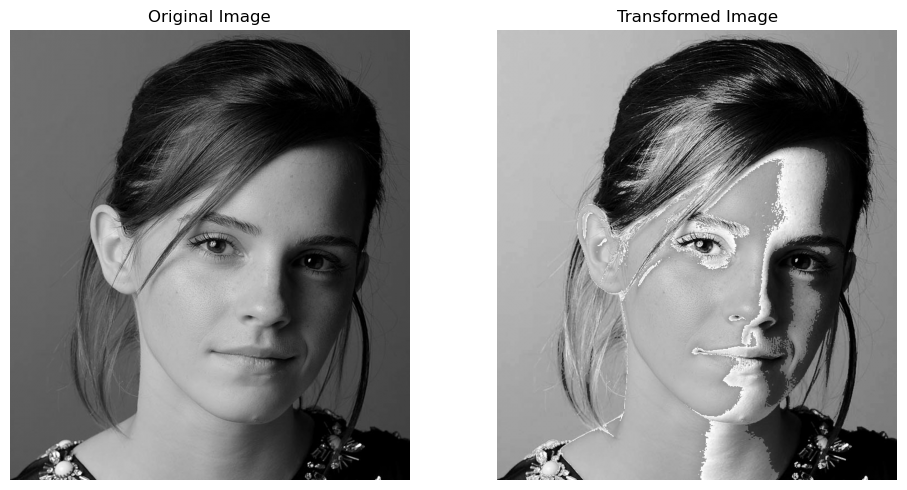

In [17]:


# Apply the transformation to the image
transformed_image = transformation[image]

# Display original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Question 2

In [18]:


# Load brain image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None, "Brain image not found"

def apply_gaussian_transform(image, mu, sigma, plot_title=""):
    """Apply Gaussian transformation and plot results"""
    # Create Gaussian pulse transformation
    x = np.linspace(0, 255, 256)
    t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))
    t = np.clip(t, 0, 255).astype('uint8')
    
    # Plot transformation curve
    plt.figure(figsize=(5, 5))
    plt.plot(t)
    plt.title(plot_title)
    plt.xlabel("Input Intensity")
    plt.ylabel("Output Intensity")
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid(True)
    plt.show()
    
    # Apply transformation
    transformed = t[image]
    
    # Display result
    plt.figure(figsize=(5, 5))
    plt.imshow(transformed, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    
    return transformed



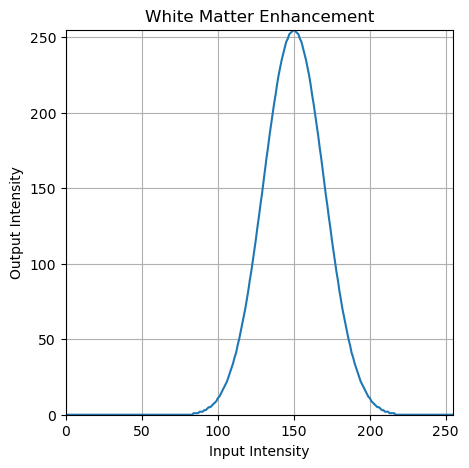

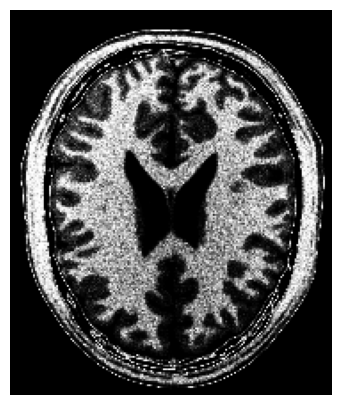

In [19]:
# Part (a) Accentuate white matter (brighter regions)
white_matter = apply_gaussian_transform(brain, mu=150, sigma=20, 
                                      plot_title="White Matter Enhancement")


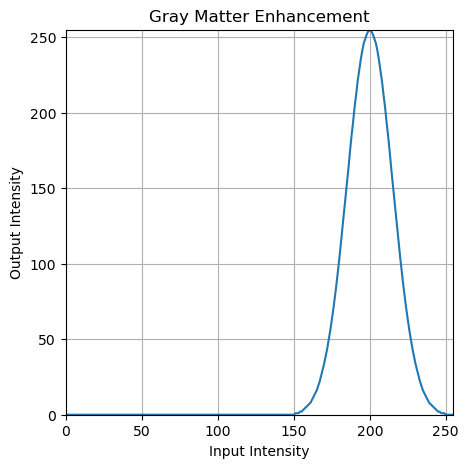

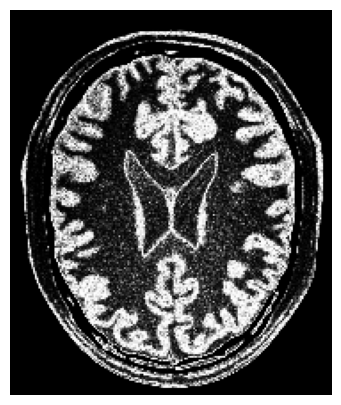

In [20]:

# Part (b) Accentuate gray matter (darker regions)
gray_matter = apply_gaussian_transform(brain, mu=200, sigma=15,
                                     plot_title="Gray Matter Enhancement")

# Question 3

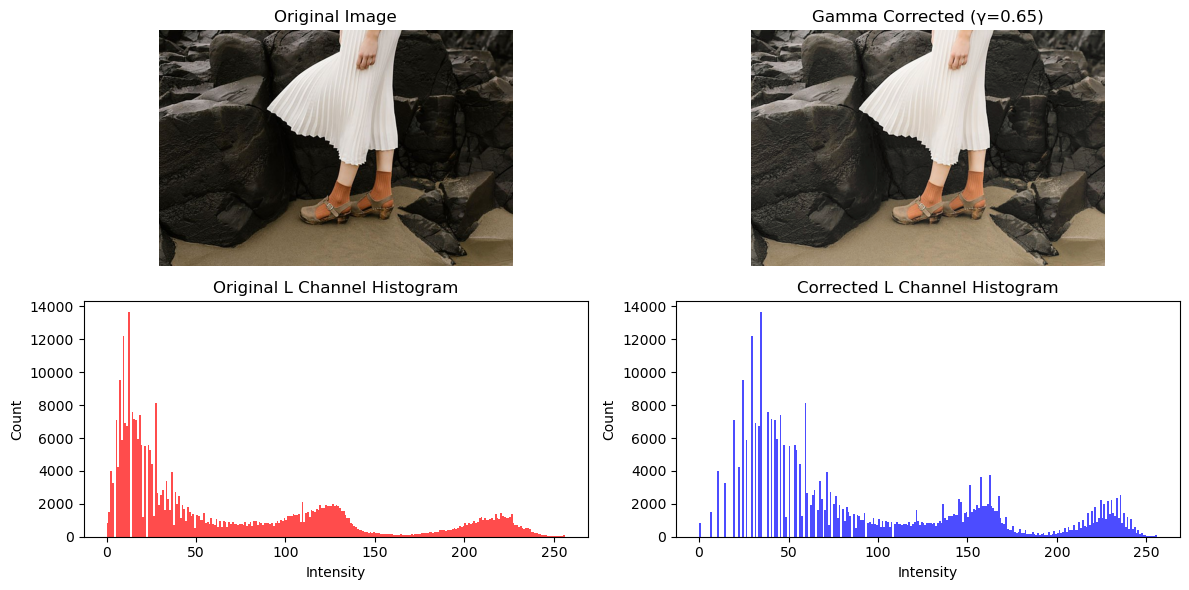

In [28]:


# Load and convert image
img = cv.imread('a1images/highlights_and_shadows.jpg')
assert img is not None, "Image not found"
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)

# Gamma correction parameters
gamma = 0.65  # Different gamma value for variation
gamma_table = np.array([((i / 255.0) ** gamma) * 255 
                       for i in np.arange(0, 256)]).astype('uint8')

# Apply gamma correction
L_corrected = cv.LUT(L, gamma_table)
lab_corrected = cv.merge([L_corrected, a, b])
rgb_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rgb_corrected)
plt.title(f'Gamma Corrected (γ={gamma})')
plt.axis('off')

# Histogram analysis (with corrected parameter passing)
plt.subplot(2, 2, 3)
plt.hist(L.ravel(), bins=256, range=(0, 256), color='r', alpha=0.7)
plt.title('Original L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(L_corrected.ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.title('Corrected L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Question 4

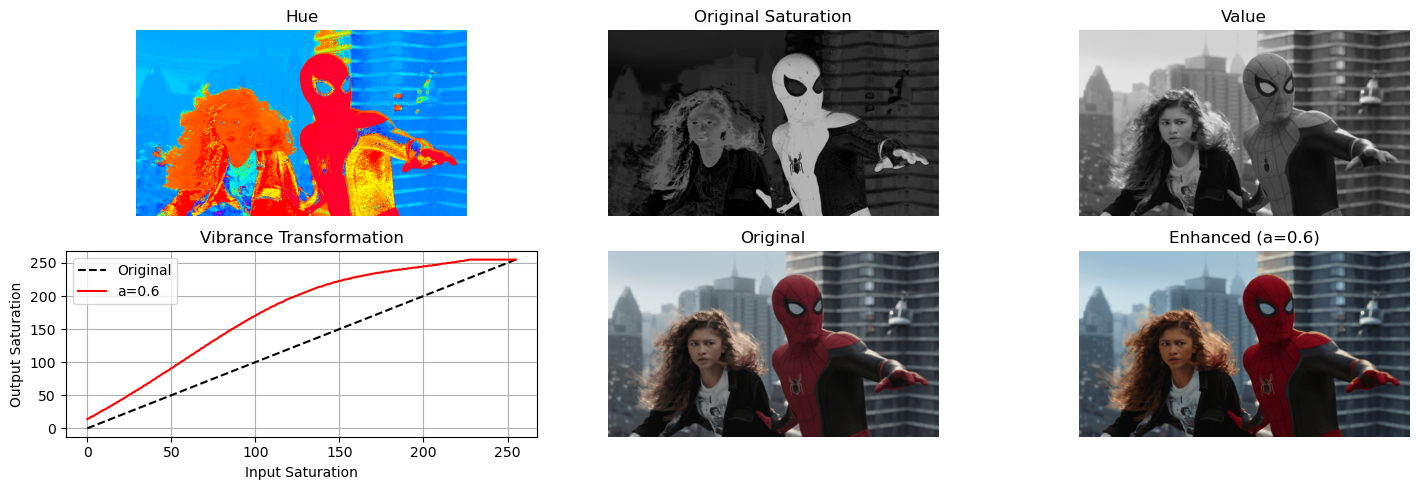

In [30]:

# Load and convert image
img = cv.imread('a1images/spider.png')
assert img is not None, "Image not found"
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_hsv)

# Vibrance transformation function
def create_vibrance_lut(a=0.6, sigma=70):
    x = np.arange(256)
    transform = np.minimum(
        x + a * 128 * np.exp(-((x-128)**2)/(2*sigma**2)),
        255
    ).astype('uint8')
    return transform

# Find optimal a parameter
best_a = 0.6  # Determined through visual inspection
vibrance_lut = create_vibrance_lut(a=best_a)
S_enhanced = cv.LUT(S, vibrance_lut)

# Recombine channels
enhanced_hsv = cv.merge([H, S_enhanced, V])
enhanced_rgb = cv.cvtColor(enhanced_hsv, cv.COLOR_HSV2RGB)

# Visualization
plt.figure(figsize=(15, 5))

# HSV components
plt.subplot(2, 3, 1)
plt.imshow(H, cmap='hsv', vmin=0, vmax=179)  # Hue range is 0-179 in OpenCV
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.title('Original Saturation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(V, cmap='gray', vmin=0, vmax=255)
plt.title('Value')
plt.axis('off')

# Transformation curve
plt.subplot(2, 3, 4)
x = np.arange(256)
plt.plot(x, create_vibrance_lut(a=0), 'k--', label='Original')
plt.plot(x, create_vibrance_lut(a=best_a), 'r-', label=f'a={best_a}')
plt.title('Vibrance Transformation')
plt.xlabel('Input Saturation')
plt.ylabel('Output Saturation')
plt.grid(True)
plt.legend()

# Results
plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(enhanced_rgb)
plt.title(f'Enhanced (a={best_a})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Question 5

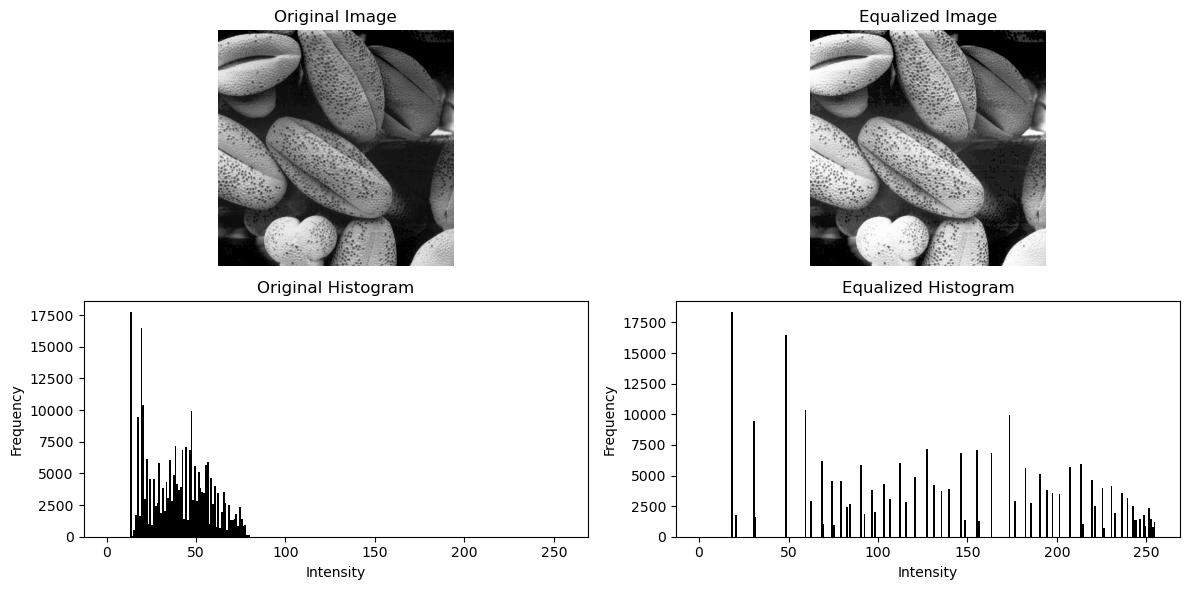

In [36]:


def custom_hist_equalize(image):
    """Enhanced histogram equalization function with proper CDF normalization"""
    # Calculate histogram
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    
    # Calculate CDF with proper normalization
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255 / 
                     (cdf.max() - cdf.min())).astype('uint8')
    
    # Apply mapping
    return cdf_normalized[image]

# Load image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None, "Image not found"

# Apply equalization
equalized = custom_hist_equalize(shells)

# Create composite visualization
plt.figure(figsize=(12, 6))

# Original and equalized images
plt.subplot(2, 2, 1)
plt.imshow(shells, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Histograms (with corrected parameter passing)
plt.subplot(2, 2, 3)
plt.hist(shells.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Original Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('hist_equalization_results.png', dpi=300, bbox_inches='tight')
plt.show()